In [39]:
import pandas as pd
import nltk
import re
import spacy

# from tabulate import tabulate

# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
eng = spacy.load('en_core_web_lg')

In [40]:
ds = pd.read_csv('Restaurant_Reviews.tsv',delimiter='\t')
ds.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [41]:
#nltk
corpus = []
for i in ds['Review']:
    review = re.sub('[^a-zA-z]',' ',i)
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    stwords = stopwords.words('english')
    stwords.remove("not")
    review = [ps.stem(word) for word in review if word not in stwords]
    review = ' '.join(review)
    corpus.append(review)
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

In [42]:
#spacy
corpus_spacy = []
for i in ds['Review']:
    review = re.sub('[^a-zA-z]',' ',i)
    review = review.lower()
    stwords = stopwords.words('english')
    stwords.remove("not")
    review = eng(review)
    review = [token.lemma_ for token in review if str(token) not in stwords]
    review = ' '.join(review)
    corpus_spacy.append(review)
print(corpus_spacy)

['wow     love place', 'crust not good', 'not tasty texture nasty', 'stop late may bank holiday rick steve recommendation love', 'selection menu great price', 'get angry want damn pho', 'honeslty taste fresh  ', 'potato like rubber could tell make ahead time keep warm', 'fry great', 'great touch', 'service prompt', 'would not go back', 'cashier care ever say still end wayyy overpriced', 'try cape cod ravoli   chicken   cranberry    mmmm', 'disgusted pretty sure human hair', 'shocked sign indicate cash', 'highly recommend', 'waitress little slow service', 'place not worth time   let alone vegas', 'not like', 'burrittos blah', 'food   amazing', 'service also cute', 'could care less     interior beautiful', 'perform', 'right     red velvet cake      ohhh stuff good', '   never bring salad ask', 'hole wall great mexican street taco   friendly staff', 'take hour get food    table restaurant food luke warm   sever run around like totally overwhelmed', 'bad salmon sashimi', 'also combo like b

In [43]:
print(len(corpus),len(corpus_spacy))

1000 1000


In [44]:
#nltk
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()
y = ds.iloc[:,1].values

In [45]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [46]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

In [47]:
# cv.get_feature_names()

In [48]:
# len(cv.get_feature_names())

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [50]:
modelDataNltk = []

In [51]:
#LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)


score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))


modelDataNltk.append({"model_name": "LogisticRegression",
                      "Confusion Matrix": cm,
                          "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
               "accuracy": round(score1*100,2),
               "precision": round(score2,2),
               "recall": round(score3,2),
               "f1-score":round(f1_score, 2)
              })

Confusion Matrix:
 [[81 18]
 [19 82]]


Accuracy is  81.5 %
Precision is  0.82
Recall is  0.81
F1 Score is  0.82


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# KNN model
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
# Predictions
y_pred_knn = knn_classifier.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:\n", cm_knn)

# Metrics
score1_knn = accuracy_score(y_test, y_pred_knn)
score2_knn = precision_score(y_test, y_pred_knn)
score3_knn = recall_score(y_test, y_pred_knn)
print("\n")
print("Accuracy is ", round(score1_knn * 100, 2), "%")
print("Precision is ", round(score2_knn, 2))
print("Recall is ", round(score3_knn, 2))

# Calculate F1 score for KNN
precision_knn = score2_knn
recall_knn = score3_knn

# Avoid division by zero
if precision_knn + recall_knn == 0:
    f1_score_knn = 0
else:
    f1_score_knn = 2 * (precision_knn * recall_knn) / (precision_knn + recall_knn)

print("F1 Score is ", round(f1_score_knn, 2))

# Append results to modelDataNltk list
modelDataNltk.append({
    "model_name": "KNeighborsClassifier",
    "Confusion Matrix": cm_knn,
        "y_test":y_test,
    "y_pred":y_pred_knn,
    "y_pred_proba":y_predproba,
    "accuracy": round(score1_knn * 100, 2),
    "precision": round(score2_knn, 2),
    "recall": round(score3_knn, 2),
    "f1-score": round(f1_score_knn, 2)
})


Confusion Matrix:
 [[73 26]
 [38 63]]


Accuracy is  68.0 %
Precision is  0.71
Recall is  0.62
F1 Score is  0.66


In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Random Forest
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("\n")
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))

modelDataNltk.append({
    "model_name": "RandomForest",
    "Confusion Matrix": cm,
        "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
    "accuracy": round(score1 * 100, 2),
    "precision": round(score2, 2),
    "recall": round(score3, 2),
    "f1-score": round(f1_score, 2)
})


Confusion Matrix:
 [[87 12]
 [30 71]]


Accuracy is  79.0 %
Precision is  0.86
Recall is  0.7
F1 Score is  0.77


In [54]:
from sklearn.svm import SVC

# Support Vector Machine
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred_svm = svm_classifier.predict(X_test)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:\n", cm_svm)

score1_svm = accuracy_score(y_test, y_pred_svm)
score2_svm = precision_score(y_test, y_pred_svm)
score3_svm = recall_score(y_test, y_pred_svm)
print("\n")
print("Accuracy is ", round(score1_svm * 100, 2), "%")
print("Precision is ", round(score2_svm, 2))
print("Recall is ", round(score3_svm, 2))

# Calculate F1 score for SVM
precision_svm = score2_svm
recall_svm = score3_svm

# Avoid division by zero
if precision_svm + recall_svm == 0:
    f1_score_svm = 0
else:
    f1_score_svm = 2 * (precision_svm * recall_svm) / (precision_svm + recall_svm)

print("F1 Score is ", round(f1_score_svm, 2))

# Append results to the modelDataNltk list
modelDataNltk.append({
    "model_name": "SupportVectorMachine",
    "Confusion Matrix": cm_svm,
        "y_test":y_test,
    "y_pred":y_pred_svm,
    "y_pred_proba":y_predproba,
    "accuracy": round(score1_svm * 100, 2),
    "precision": round(score2_svm, 2),
    "recall": round(score3_svm, 2),
    "f1-score": round(f1_score_svm, 2)
})


Confusion Matrix:
 [[87 12]
 [24 77]]


Accuracy is  82.0 %
Precision is  0.87
Recall is  0.76
F1 Score is  0.81


In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score


# Multinomial Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("\n")
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))

modelDataNltk.append({
    "model_name": "MultinomialNaiveBayes",
    "Confusion Matrix": cm,
        "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
    "accuracy": round(score1 * 100, 2),
    "precision": round(score2, 2),
    "recall": round(score3, 2),
    "f1-score": round(f1_score, 2)
})

Confusion Matrix:
 [[71 28]
 [18 83]]


Accuracy is  77.0 %
Precision is  0.75
Recall is  0.82
F1 Score is  0.78


In [56]:
http://localhost:8888/tree/Desktop/Sentiment-Analysis/lstm%20vs%20vader# Bernoulli Naive Bayes
from sklearn.naive_bayes import BernoulliNB

# Instantiate the Bernoulli Naive Bayes classifier
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate accuracy, precision, and recall
score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)

print("\n")
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))

# Append results to the modelDataNltk list
modelDataNltk.append({
    "model_name": "BernoulliNaiveBayes",
    "Confusion Matrix": cm,
        "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
    "accuracy": round(score1 * 100, 2),
    "precision": round(score2, 2),
    "recall": round(score3, 2),
    "f1-score": round(f1_score, 2)
})

Confusion Matrix:
 [[65 34]
 [19 82]]


Accuracy is  73.5 %
Precision is  0.71
Recall is  0.81
F1 Score is  0.76


## =============================================

In [57]:
modelDataSpacy = []

In [58]:
#spacy
cv = CountVectorizer()
X = cv.fit_transform(corpus_spacy).toarray()
y = ds.iloc[:,1].values

In [59]:
X,y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
        1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
        1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
        1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 

In [60]:
# cv.get_feature_names()

In [61]:
# len(cv.get_feature_names())

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [63]:
#LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix:\n",cm)

score1 = accuracy_score(y_test,y_pred)
score2 = precision_score(y_test,y_pred)
score3= recall_score(y_test,y_pred)
print("\n")
print("Accuracy is ",round(score1*100,2),"%")
print("Precision is ",round(score2,2))
print("Recall is ",round(score3,2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))


modelDataSpacy.append({"model_name": "LogisticRegression",
                                             "Confusion Matrix": cm,
                       "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
               "accuracy": round(score1*100,2),
               "precision": round(score2,2),
               "recall": round(score3,2),
               "f1-score":round(f1_score, 2)
              })

Confusion Matrix:
 [[82 14]
 [30 74]]


Accuracy is  78.0 %
Precision is  0.84
Recall is  0.71
F1 Score is  0.77


In [64]:
# K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# K Nearest Neighbors
classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors as needed
classifier.fit(X_train, y_train)

y_predproba =  classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("\n")
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))

modelDataSpacy.append({"model_name": "KNeighborsClassifier",
                       "Confusion Matrix": cm,
                       "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
                       "accuracy": round(score1 * 100, 2),
                       "precision": round(score2, 2),
                       "recall": round(score3, 2),
                       "f1-score": round(f1_score, 2)
                       })


Confusion Matrix:
 [[78 18]
 [52 52]]


Accuracy is  65.0 %
Precision is  0.74
Recall is  0.5
F1 Score is  0.6


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# RandomForestClassifier
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred_rf = classifier_rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm_rf)

score1_rf = accuracy_score(y_test, y_pred_rf)
score2_rf = precision_score(y_test, y_pred_rf)
score3_rf = recall_score(y_test, y_pred_rf)
print("\n")
print("Accuracy is ", round(score1_rf * 100, 2), "%")
print("Precision is ", round(score2_rf, 2))
print("Recall is ", round(score3_rf, 2))

# Calculate F1 score
precision_rf = score2_rf
recall_rf = score3_rf

# Avoid division by zero
if precision_rf + recall_rf == 0:
    f1_score_rf = 0
else:
    f1_score_rf = 2 * (precision_rf * recall_rf) / (precision_rf + recall_rf)

print("F1 Score is ", round(f1_score_rf, 2))

modelDataSpacy.append({"model_name": "RandomForest",
                       "Confusion Matrix": cm_rf,
                           "y_test":y_test,
    "y_pred":y_pred_rf,
    "y_pred_proba":y_predproba,
                       "accuracy": round(score1_rf * 100, 2),
                       "precision": round(score2_rf, 2),
                       "recall": round(score3_rf, 2),
                       "f1-score": round(f1_score_rf, 2)
                       })


Confusion Matrix:
 [[86 10]
 [42 62]]


Accuracy is  74.0 %
Precision is  0.86
Recall is  0.6
F1 Score is  0.7


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

from sklearn.svm import SVC

# Support Vector Machine
classifier = SVC(probability=True)
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("\n")
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))

modelDataSpacy.append({
    "model_name": "SupportVectorMachine",
    "Confusion Matrix": cm,
    "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
    "accuracy": round(score1 * 100, 2),
    "precision": round(score2, 2),
    "recall": round(score3, 2),
    "f1-score": round(f1_score, 2)
})


Confusion Matrix:
 [[87  9]
 [42 62]]


Accuracy is  74.5 %
Precision is  0.87
Recall is  0.6
F1 Score is  0.71


In [67]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# Multinomial Naive Bayes
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("\n")
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))

modelDataSpacy.append({
    "model_name": "MultinomialNaiveBayes",
    "Confusion Matrix": cm,
    "y_test":y_test,
    "y_pred":y_pred,
    "y_pred_proba":y_predproba,
    "accuracy": round(score1 * 100, 2),
    "precision": round(score2, 2),
    "recall": round(score3, 2),
    "f1-score": round(f1_score, 2)
})


Confusion Matrix:
 [[77 19]
 [27 77]]


Accuracy is  77.0 %
Precision is  0.8
Recall is  0.74
F1 Score is  0.77


In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.naive_bayes import BernoulliNB


# Bernoulli Naive Bayes
classifier = BernoulliNB()
classifier.fit(X_train, y_train)

y_predproba = classifier.predict_proba(X_test)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

score1 = accuracy_score(y_test, y_pred)
score2 = precision_score(y_test, y_pred)
score3 = recall_score(y_test, y_pred)
print("\n")
print("Accuracy is ", round(score1 * 100, 2), "%")
print("Precision is ", round(score2, 2))
print("Recall is ", round(score3, 2))

# Calculate F1 score
precision = score2
recall = score3

# Avoid division by zero
if precision + recall == 0:
    f1_score = 0
else:
    f1_score = 2 * (precision * recall) / (precision + recall)

print("F1 Score is ", round(f1_score, 2))

modelDataSpacy.append({"model_name": "BernoulliNaiveBayes",
                       "Confusion Matrix": cm,
                       "y_test":y_test,
                       "y_pred":y_pred,
                       "y_pred_proba":y_predproba,
                       "accuracy": round(score1 * 100, 2),
                       "precision": round(score2, 2),
                       "recall": round(score3, 2),
                       "f1-score": round(f1_score, 2)
                       })


Confusion Matrix:
 [[75 21]
 [26 78]]


Accuracy is  76.5 %
Precision is  0.79
Recall is  0.75
F1 Score is  0.77


## =======================================================

In [69]:
modelDataNltk

[{'model_name': 'LogisticRegression',
  'Confusion Matrix': array([[81, 18],
         [19, 82]]),
  'y_test': array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
         1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
         0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
         0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
         1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
         1, 1]),
  'y_pred': array([1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1

In [70]:
modelDataSpacy

[{'model_name': 'LogisticRegression',
  'Confusion Matrix': array([[82, 14],
         [30, 74]]),
  'y_test': array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
         0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
         1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
         1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
         0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
         1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
         0, 1]),
  'y_pred': array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
         0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
         1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1

In [71]:
# modelDataNltk
# Create a DataFrame
modelDataNltkDF = pd.DataFrame(modelDataNltk)

# Display the DataFrame
modelDataNltkDF

,model_name,Confusion Matrix,y_test,y_pred,y_pred_proba,accuracy,precision,recall,f1-score
0,LogisticRegression,"[[81, 18], [19, 82]]","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, ...","[[0.40538081958888983, 0.5946191804111102], [0...",81.5,0.82,0.81,0.82
1,KNeighborsClassifier,"[[73, 26], [38, 63]]","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...","[[0.40538081958888983, 0.5946191804111102], [0...",68.0,0.71,0.62,0.66
2,RandomForest,"[[87, 12], [30, 71]]","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, ...","[[0.55, 0.45], [0.23, 0.77], [0.3, 0.7], [0.51...",79.0,0.86,0.70,0.77
3,SupportVectorMachine,"[[87, 12], [24, 77]]","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, ...","[[0.55, 0.45], [0.23, 0.77], [0.3, 0.7], [0.51...",82.0,0.87,0.76,0.81
4,MultinomialNaiveBayes,"[[71, 28], [18, 83]]","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...","[[0.2503178936039275, 0.749682106396072], [0.0...",77.0,0.75,0.82,0.78
5,BernoulliNaiveBayes,"[[65, 34], [19, 82]]","[0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, ...","[1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, ...","[[0.21166044474792925, 0.7883395552520716], [0...",73.5,0.71,0.81,0.76


In [72]:
# modelDataSpacy
# Create a DataFrame
modelDataSpacyDF = pd.DataFrame(modelDataSpacy)

# Display the DataFrame
modelDataSpacyDF

,model_name,Confusion Matrix,y_test,y_pred,y_pred_proba,accuracy,precision,recall,f1-score
0,LogisticRegression,"[[82, 14], [30, 74]]","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...","[[0.6805409501233788, 0.31945904987662127], [0...",78.0,0.84,0.71,0.77
1,KNeighborsClassifier,"[[78, 18], [52, 52]]","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, ...","[[1.0, 0.0], [0.2, 0.8], [0.0, 1.0], [0.2, 0.8...",65.0,0.74,0.50,0.60
2,RandomForest,"[[86, 10], [42, 62]]","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, ...","[[1.0, 0.0], [0.2, 0.8], [0.0, 1.0], [0.2, 0.8...",74.0,0.86,0.60,0.70
3,SupportVectorMachine,"[[87, 9], [42, 62]]","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, ...","[[0.9114959630705082, 0.08850403692949169], [0...",74.5,0.87,0.60,0.71
4,MultinomialNaiveBayes,"[[77, 19], [27, 77]]","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...","[[0.7399841328108819, 0.26001586718911734], [0...",77.0,0.80,0.74,0.77
5,BernoulliNaiveBayes,"[[75, 21], [26, 78]]","[1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, ...","[[0.5800953004669243, 0.41990469953307497], [0...",76.5,0.79,0.75,0.77


In [73]:
modelDataNltk = modelDataNltkDF.to_dict('list')
modelDataNltk

{'model_name': ['LogisticRegression',
  'KNeighborsClassifier',
  'RandomForest',
  'SupportVectorMachine',
  'MultinomialNaiveBayes',
  'BernoulliNaiveBayes'],
 'Confusion Matrix': [array([[81, 18],
         [19, 82]]),
  array([[73, 26],
         [38, 63]]),
  array([[87, 12],
         [30, 71]]),
  array([[87, 12],
         [24, 77]]),
  array([[71, 28],
         [18, 83]]),
  array([[65, 34],
         [19, 82]])],
 'y_test': [array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
         0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
         1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
         1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
         0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
         0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
         0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0

In [74]:
modelDataSpacyDF = modelDataSpacyDF.to_dict('list')
modelDataSpacyDF

{'model_name': ['LogisticRegression',
  'KNeighborsClassifier',
  'RandomForest',
  'SupportVectorMachine',
  'MultinomialNaiveBayes',
  'BernoulliNaiveBayes'],
 'Confusion Matrix': [array([[82, 14],
         [30, 74]]),
  array([[78, 18],
         [52, 52]]),
  array([[86, 10],
         [42, 62]]),
  array([[87,  9],
         [42, 62]]),
  array([[77, 19],
         [27, 77]]),
  array([[75, 21],
         [26, 78]])],
 'y_test': [array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1,
         0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
         1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
         1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
         1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
         1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
         0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1

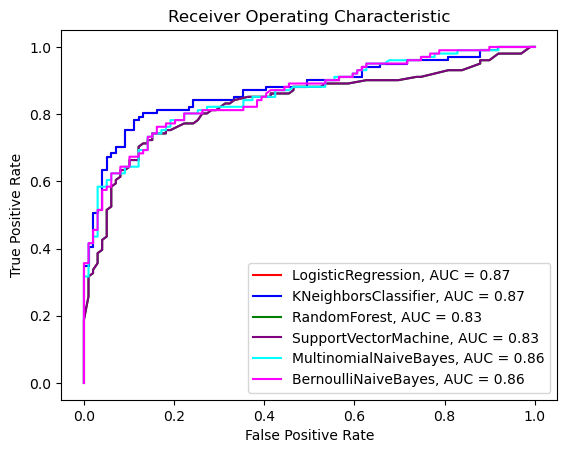

In [75]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

df = pd.DataFrame(modelDataNltkDF)
# Create figure and axes
fig, ax = plt.subplots()

# Set ROC curve color based on the model
colors = {
    'LogisticRegression': 'red',
          'KNeighborsClassifier': 'blue',
          'RandomForest': 'green',
          'SupportVectorMachine': 'purple',
          'MultinomialNaiveBayes': 'cyan',
          'BernoulliNaiveBayes': 'magenta'
}

# -Generate ROC curve for each model
for i, model in enumerate(df['model_name']):
    fpr, tpr, _ = roc_curve(df['y_test'][i], df['y_pred_proba'][i][:, 1])
    roc_auc = auc(fpr, tpr)
    label = '{}, AUC = {:.2f}'.format(model, roc_auc)
    ax.plot(fpr, tpr, color=colors[model], label=label)

# -Set title and labels for axes
ax.set_title('Receiver Operating Characteristic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# -Create legend
ax.legend(loc='lower right')

# -Show the plot
plt.show()

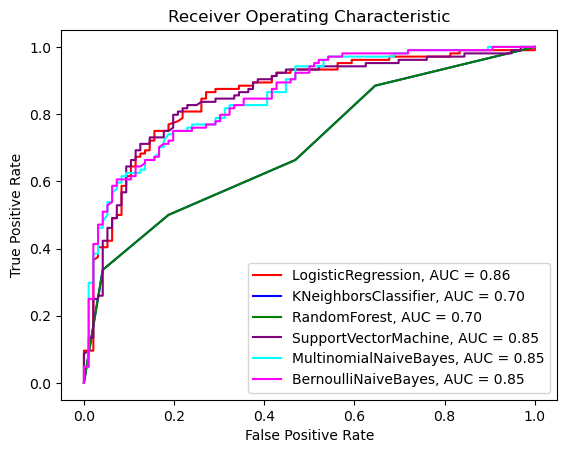

In [76]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.metrics import roc_curve, auc
# import matplotlib.pyplot as plt

df = pd.DataFrame(modelDataSpacyDF)
# Create figure and axes
fig, ax = plt.subplots()

# Set ROC curve color based on the model
colors = {
    'LogisticRegression': 'red',
          'KNeighborsClassifier': 'blue',
          'RandomForest': 'green',
          'SupportVectorMachine': 'purple',
          'MultinomialNaiveBayes': 'cyan',
          'BernoulliNaiveBayes': 'magenta'
}

# -Generate ROC curve for each model
for i, model in enumerate(df['model_name']):
    fpr, tpr, _ = roc_curve(df['y_test'][i], df['y_pred_proba'][i][:, 1])
    roc_auc = auc(fpr, tpr)
    label = '{}, AUC = {:.2f}'.format(model, roc_auc)
    ax.plot(fpr, tpr, color=colors[model], label=label)

# -Set title and labels for axes
ax.set_title('Receiver Operating Characteristic')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

# -Create legend
ax.legend(loc='lower right')

# -Show the plot
plt.show()